# Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Download and Import the CSV Data as Pandas DataFrame

In [5]:
data = pd.read_csv("aug_test.csv")

# Show Top 5 Records

In [6]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


# Shape of the dataset

In [7]:
data.shape

(2129, 13)

# Summary of the dataset

In [10]:
# Display summary statistics for a dataframe
data.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


# Check Datatypes in the dataset

In [11]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


# EXPLORING DATA

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['enrollee_id', 'city_development_index', 'training_hours']

We have 10 categorical features : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [13]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

city_103    22.217003
city_21     14.936590
city_16      7.891029
city_114     7.280413
city_160     5.307656
              ...    
city_179     0.046970
city_39      0.046970
city_139     0.046970
city_31      0.046970
city_78      0.046970
Name: city, Length: 108, dtype: float64
---------------------------
Male      90.067859
Female     8.451573
Other      1.480568
Name: gender, dtype: float64
---------------------------
Has relevent experience    71.582903
No relevent experience     28.417097
Name: relevent_experience, dtype: float64
---------------------------
no_enrollment       72.402288
Full time course    20.734032
Part time course     6.863680
Name: enrolled_university, dtype: float64
---------------------------
Graduate          61.097737
Masters           23.880597
High School       10.688493
Phd                2.599904
Primary School     1.733269
Name: education_level, dtype: float64
---------------------------
STEM               89.212988
Humanities          4.402862
Other

# Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Features

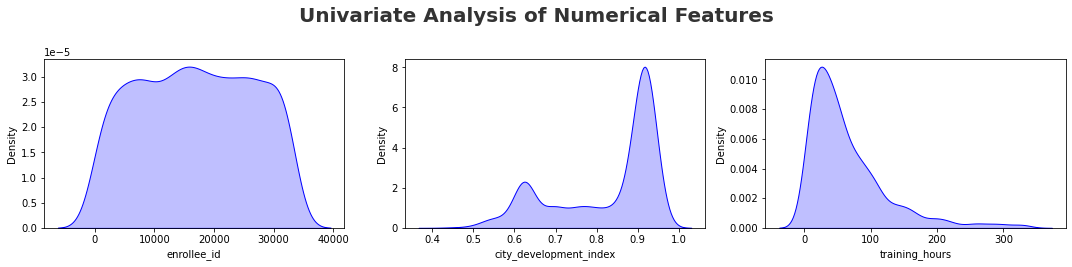

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Report

Training_Hours is right skewed and postively skewed.

Outliers in enrollee_id, training_hours.

# Categorical Features

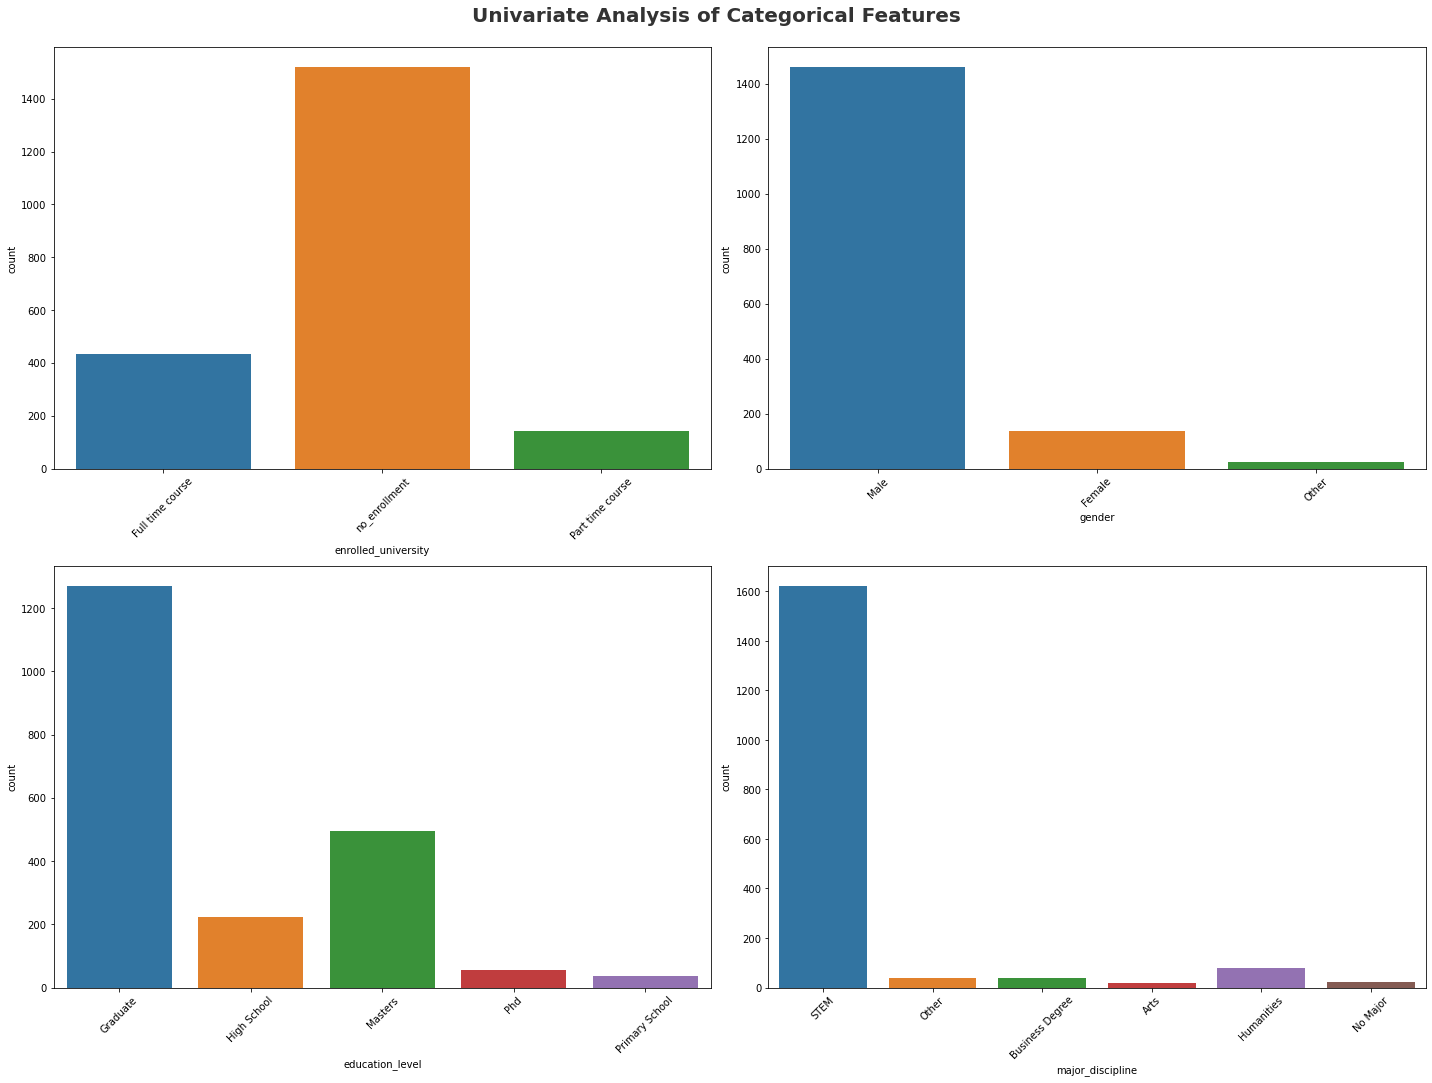

In [16]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'enrolled_university', 'gender', 'education_level', 'major_discipline']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

# Check Multicollinearity in Numerical features

In [17]:
data[(list(data.columns)[1:])].corr()

,city_development_index,training_hours
city_development_index,1.000000,-0.022653
training_hours,-0.022653,1.000000


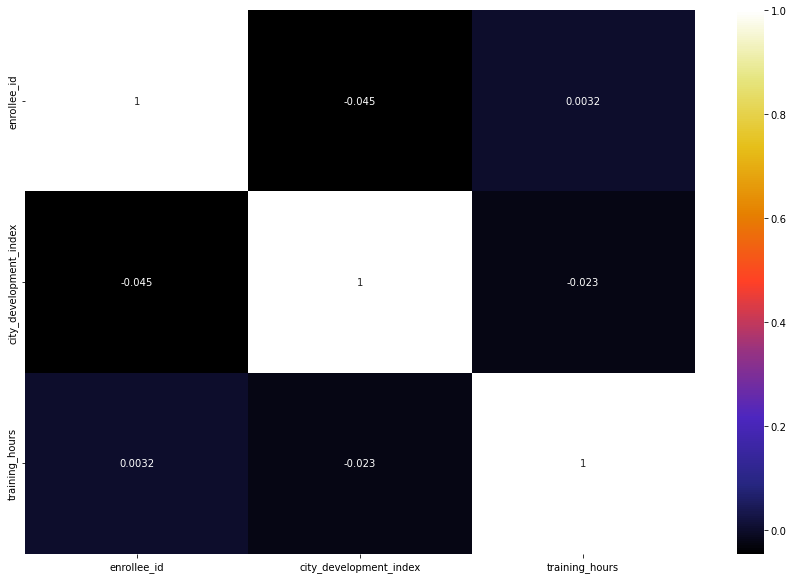

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

# Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e Selling Price

In [21]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['experience'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,city,Reject Null Hypothesis
1,gender,Reject Null Hypothesis
2,relevent_experience,Reject Null Hypothesis
3,enrolled_university,Reject Null Hypothesis
4,education_level,Reject Null Hypothesis
5,major_discipline,Fail to Reject Null Hypothesis
6,experience,Reject Null Hypothesis
7,company_size,Fail to Reject Null Hypothesis
8,company_type,Reject Null Hypothesis
9,last_new_job,Reject Null Hypothesis


# Checking Null Values

In [22]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [24]:
continues_features=[feature for feature in numeric_features if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['enrollee_id', 'city_development_index', 'training_hours']


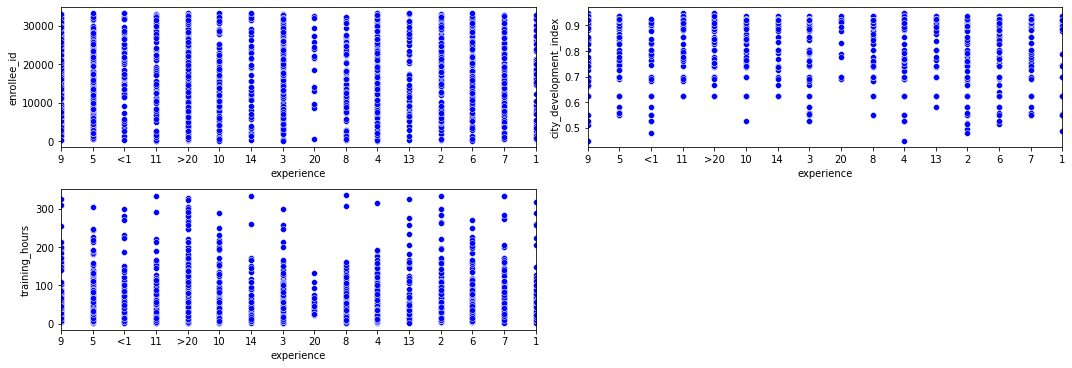

In [33]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= data ,x='experience', y=continues_features[i], color='b')
    plt.xlim(0,15) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

# Visualization

# Visualize the Target Feature


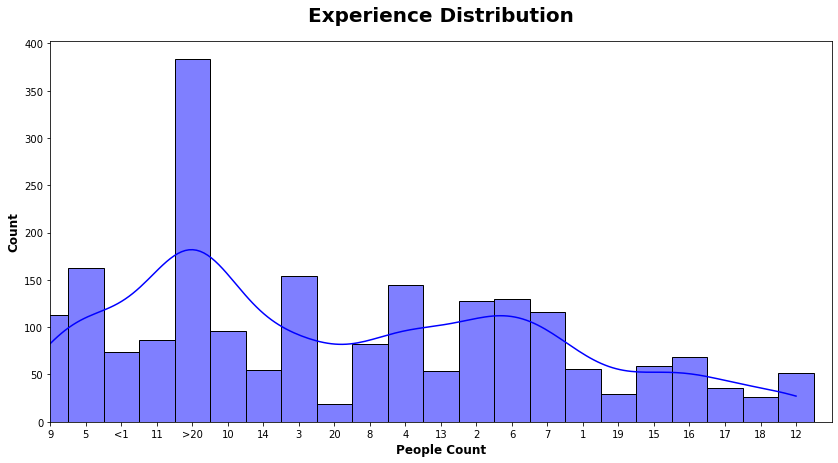

In [40]:
plt.subplots(figsize=(14,7))
sns.histplot(data.experience, bins=10, kde=True, color = 'b')
plt.title("Experience Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("People Count", weight="bold", fontsize=12)
plt.xlim(0,22)
plt.show()

In [41]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [ ]:
Most experience people have?

In [42]:
data.experience.value_counts()[0:10]

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
Name: experience, dtype: int64

# Most people have More than 20 years of experience

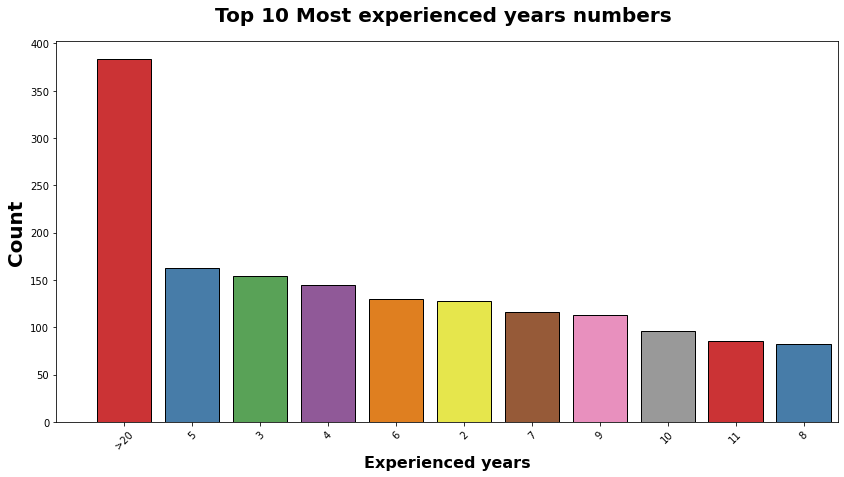

In [53]:
plt.subplots(figsize=(14,7))
sns.countplot(x="experience", data=data,ec = "black",palette="Set1",order = data['experience'].value_counts().index)
plt.title("Top 10 Most experienced years numbers ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Experienced years", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [55]:
data[data['experience'] == '>20']['training_hours'].mean()


67.94516971279373

# Report:

As per the Chart these are top 10 most experienced years count in table.

Mean hours of Most experienced count is 67.94 hours.

This Feature has impact on the Target Variable.

# Most experienced gender

In [57]:
data.gender.value_counts()


Male      1460
Female     137
Other       24
Name: gender, dtype: int64

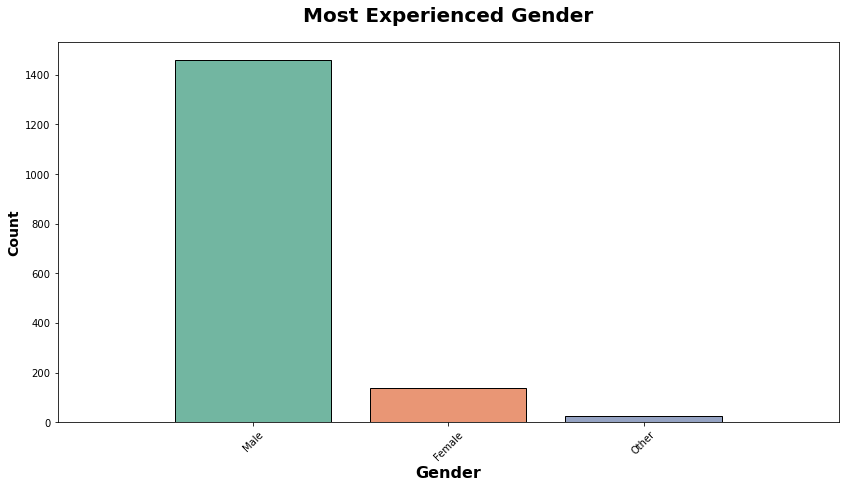

In [62]:
plt.subplots(figsize=(14,7))
sns.countplot(x="gender", data=data,ec = "black",palette="Set2",order = data['gender'].value_counts().index)
plt.title("Most Experienced Gender", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,3)
plt.show()

In [69]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [103]:
data[(data['gender'] == 'Male') | (data['enrolled_university'] == 'Full time course')]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Full time course,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
9,16287,city_21,0.624,Full time course,Has relevent experience,Full time course,Graduate,NaN,3,50-99,Funded Startup,1,4
15,24914,city_21,0.624,Full time course,Has relevent experience,Full time course,Graduate,STEM,13,1000-4999,Pvt Ltd,1,125
19,29033,city_21,0.624,Full time course,No relevent experience,Full time course,NaN,NaN,2,NaN,NaN,never,110
20,15359,city_103,0.920,Full time course,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,23606,city_103,0.920,Full time course,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,1,41
2104,15293,city_103,0.920,Full time course,No relevent experience,Full time course,Graduate,STEM,1,NaN,NaN,never,101
2119,8905,city_70,0.698,Full time course,No relevent experience,Full time course,High School,NaN,8,NaN,NaN,never,55
2123,21339,city_21,0.624,Full time course,No relevent experience,Full time course,High School,NaN,3,NaN,NaN,never,56


In [105]:
data['city_development_index'].max()

0.949

In [106]:
data['city_development_index'].min()

0.4479999999999999

In [108]:
data['city_development_index'].mean()

0.8249835603569861

In [110]:
data[data['city_development_index'] > 0.400]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Full time course,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Full time course,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Full time course,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Full time course,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Full time course,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Full time course,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Full time course,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [133]:
data[data['major_discipline'] == 'STEM']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Full time course,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
3,27385,city_13,0.827,Full time course,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
5,217,city_23,0.899,Full time course,No relevent experience,Part time course,Masters,STEM,10,NaN,NaN,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,21500,city_44,0.725,Full time course,No relevent experience,Part time course,Graduate,STEM,7,<10,Early Stage Startup,never,160
2121,27163,city_173,0.878,Full time course,No relevent experience,no_enrollment,Masters,STEM,16,<10,Pvt Ltd,>4,58
2122,24507,city_90,0.698,Full time course,No relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,never,133
2125,195,city_136,0.897,Full time course,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30


In [131]:
data.duplicated().sum()

0

In [119]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Full time course,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Full time course,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Full time course,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Full time course,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
